<a href="https://colab.research.google.com/github/Debasmita-Halder/tutorial-1/blob/main/EDA_using_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
import pingouin as pg
from pingouin import qqplot

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.ndim

2

In [ ]:
df.shape

(891, 15)

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
import missingno as msno

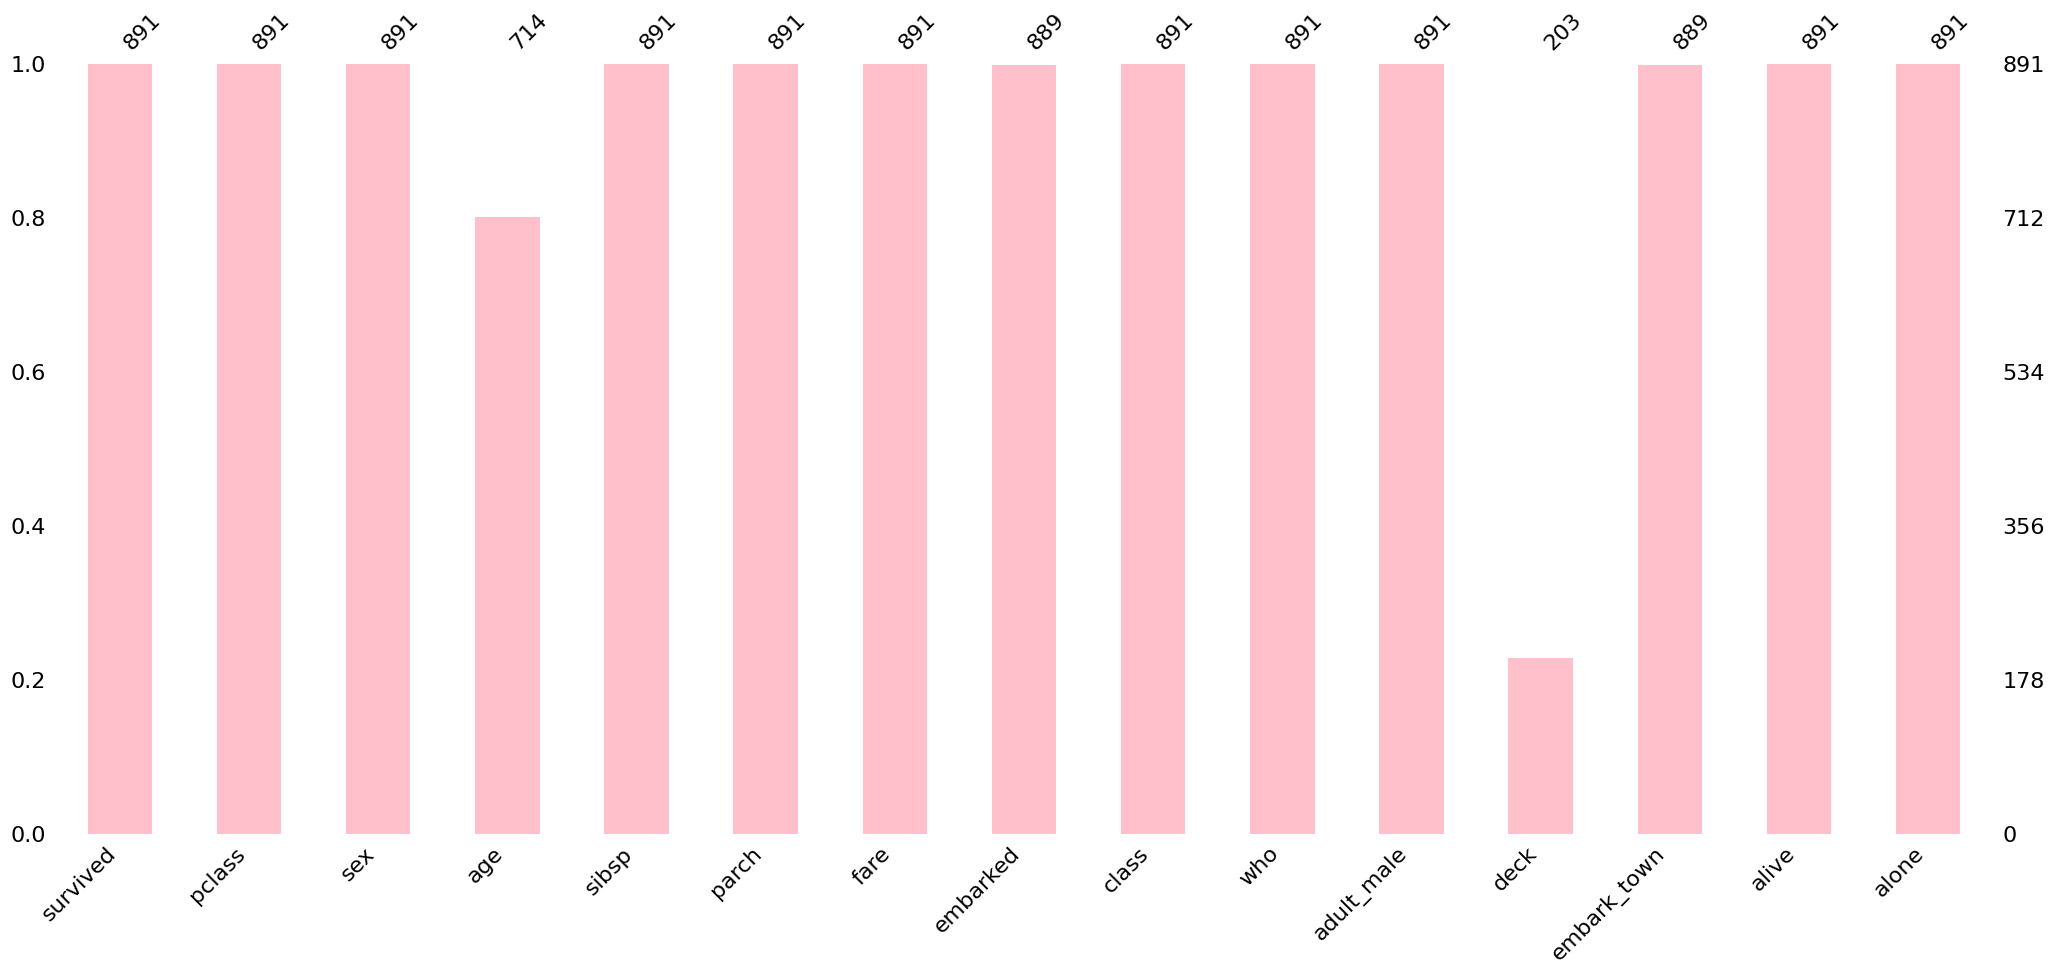

In [ ]:
msno.bar(df,color="pink")
plt.show()

In [ ]:
df["age"].fillna(df.age.median(),inplace=True)
df.age.isna().any()

False

In [ ]:
np.random.seed(42)

In [ ]:
df["deck"].fillna(np.random.choice(["C","E","G","D","A","B","F"]),inplace=True)
df.deck.isna().any()

False

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

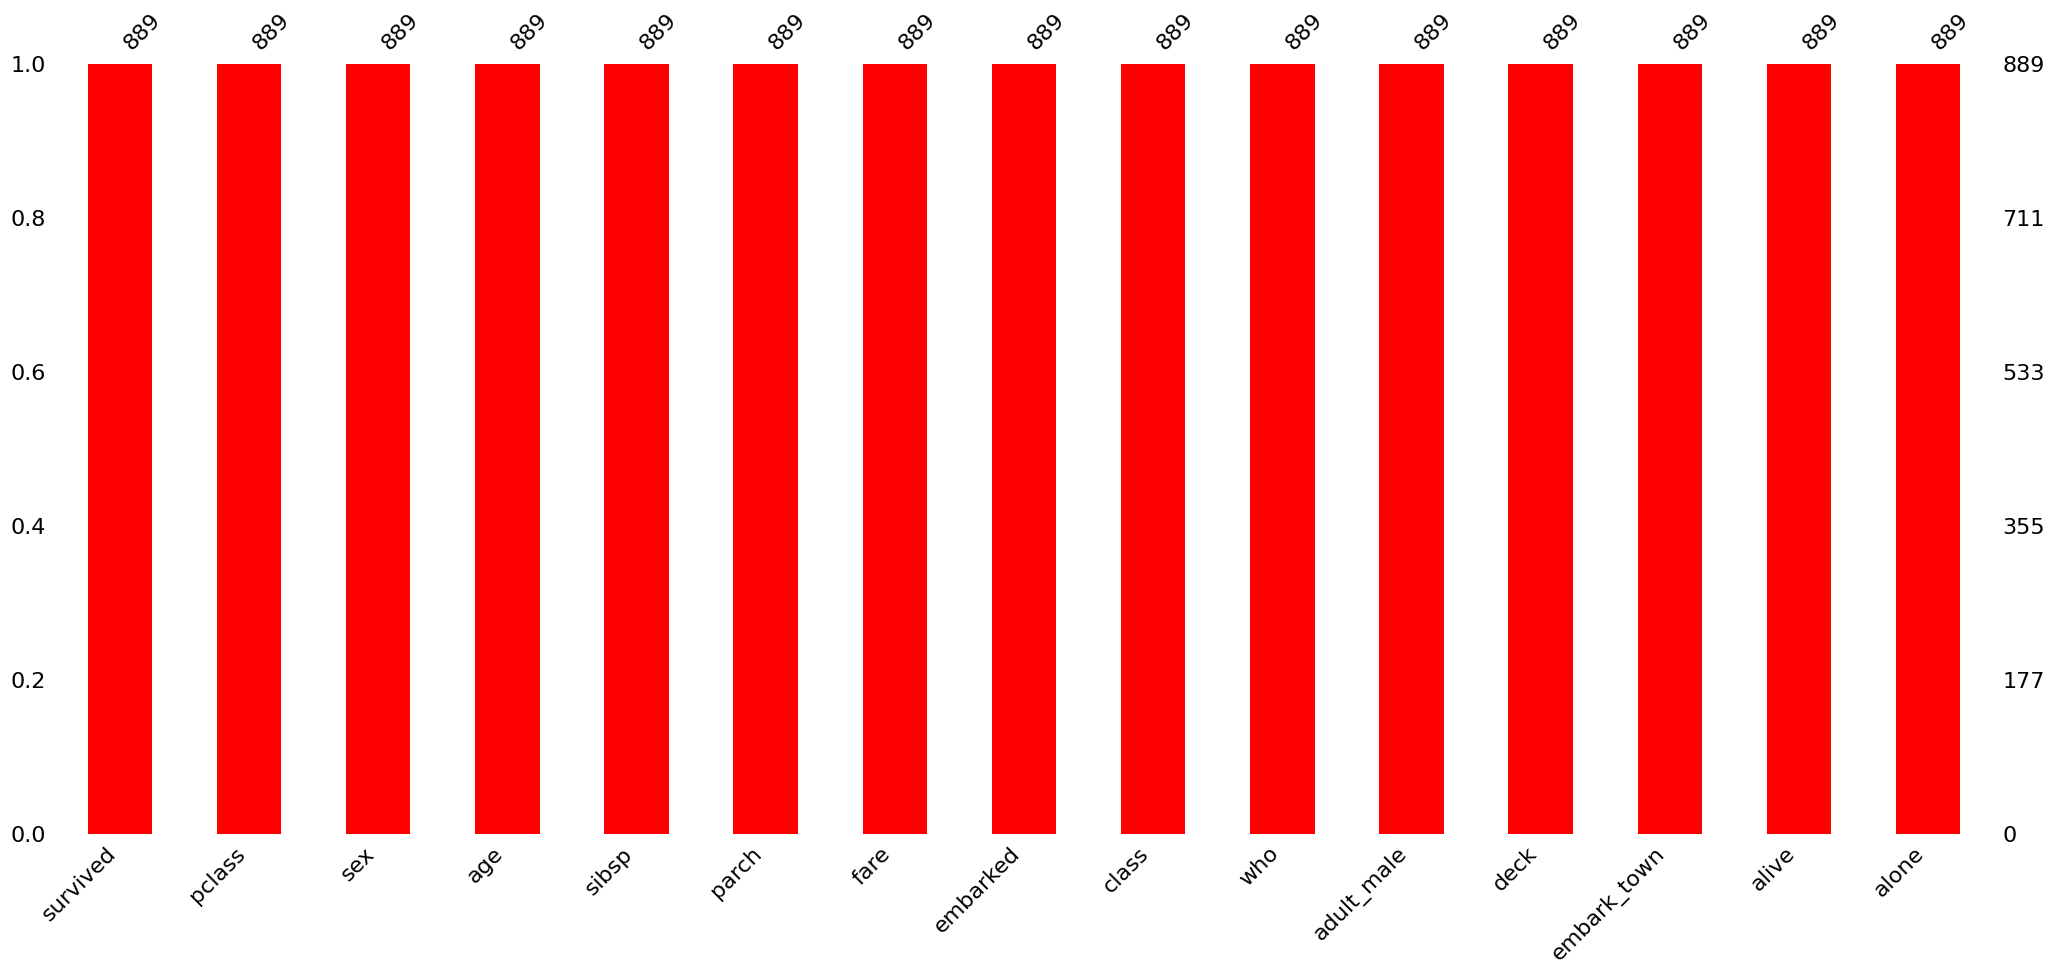

In [ ]:
msno.bar(df,color="red")
plt.show()

In [ ]:
df['survived'] = df.survived.map({0:"not survived",1:"survived"})

In [ ]:
df.survived.value_counts()

survived
not survived    549
survived        340
Name: count, dtype: int64

In [ ]:
df.sex.value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [ ]:
df.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df["class"].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [ ]:
df.who.value_counts()

who
man      537
woman    269
child     83
Name: count, dtype: int64

In [ ]:
df.adult_male.value_counts()

adult_male
True     537
False    352
Name: count, dtype: int64

In [ ]:
df.deck.value_counts()

deck
F    701
C     59
B     45
D     33
E     32
A     15
G      4
Name: count, dtype: int64

In [ ]:
df.alone.value_counts()

alone
True     535
False    354
Name: count, dtype: int64

In [ ]:
df.alive.value_counts()

alive
no     549
yes    340
Name: count, dtype: int64

In [ ]:
data=df.drop(columns=["sex","deck","embarked","class","who","embark_town","alive"])

In [ ]:
data.groupby("survived").mean()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
not survived,2.531876,30.028233,0.553734,0.329690,22.117887,0.817851,0.681239
survived,1.955882,28.163735,0.476471,0.467647,48.209498,0.258824,0.473529


In [ ]:
data.groupby('survived').var()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
not survived,0.541409,156.249658,1.659972,0.677602,985.219509,0.149243,0.217549
survived,0.744361,186.930942,0.503870,0.597770,4455.398709,0.192400,0.250035


In [ ]:
data.groupby("survived").std()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
not survived,0.735805,12.499986,1.288399,0.823166,31.388207,0.386320,0.466421
survived,0.862763,13.672269,0.709838,0.773156,66.748773,0.438634,0.500035


In [ ]:
df.describe()

,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization

In [ ]:
def plot_numerical(var):
  fig, axes =plt.subplots(2,2,figsize=(14,10))
  sns.histplot(x=df[var],ax=axes[0][0],kde=True,bins=20)
  qqplot(df[var],dist="norm",ax=axes[0][1])
  sns.stripplot(x=df.survived,y=df[var],ax=axes[1][0],palette="tab10")
  sns.barplot(x=df.survived,y=df[var],ax=axes[1][1],palette="bright")
  plt.suptitle(var.title())
  plt.show()


In [ ]:
def plot_kde(var):
  facet = sns.FacetGrid(df,hue="survived",aspect=4,palette="tab10")
  facet.map(sns.kdeplot,var,shades=True)
  facet.set(xlim=(10,df[var].max()))
  facet.add-legend()
  plt.title(var.title())
  plt.show()

In [ ]:
def plot_categorical(var):
  fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14,10))
  df[var].value_counts().plot.pie(autopct="%.0f%%",labels=df[var].unique(),shadow=True,startangle=180,ax=ax[0][0])
  df[var].value_counts().plot.barh(ax=ax[0][1])

  sns.scatterplot(x=df.fare,y=df.age,hue=df[var],ax=ax[1][0],palette="table")
  sns.stripplot(x=df[var],y=df.fare,hue=df.survived,ax=ax[1][1],palette="bright")
  fig.suptitle("count of"+var.title())
  plt.show()

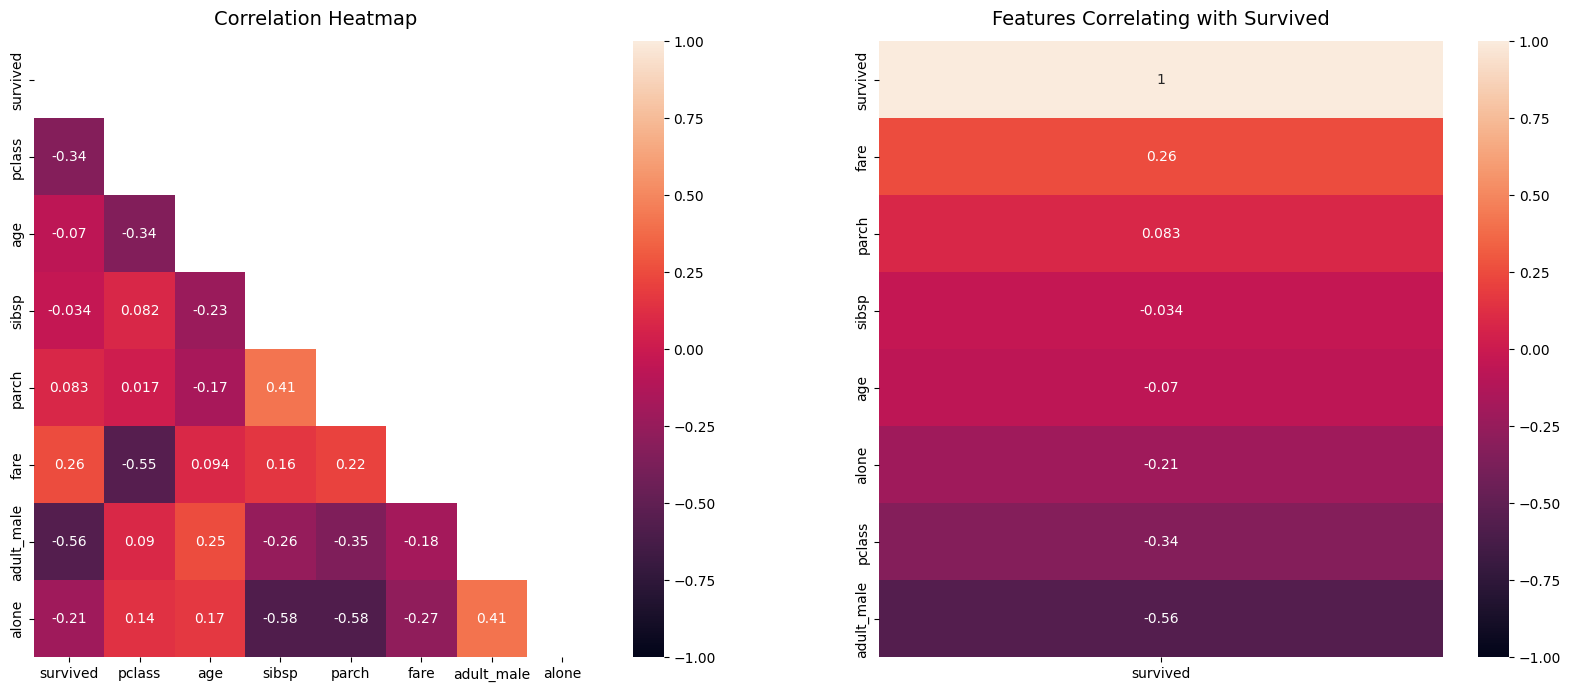

In [ ]:
numerical_columns=["age","fare","sibsp","parch"]
categorical_columns = ["survived","pclass","sex","embarked","class","who","adult male","deck","embark_town"]
df["survived"]=df.survived.map({"not survived":0,"survived":1}
                               )
data=df.drop(columns=["sex","deck","embarked","class","who","embark_town","alive"])
fig, ax=plt.subplots (ncols=2, figsize=(20,8))
resign_corr= data.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=bool))
cat_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0])
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize' :14}, pad=12);
heatmap=sns.heatmap(resign_corr[['survived' ]].sort_values (by='survived', ascending= False),
vmin=-1, vmax=1, annot=True, ax=ax[1])
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':14}, pad=12);
plt.show()

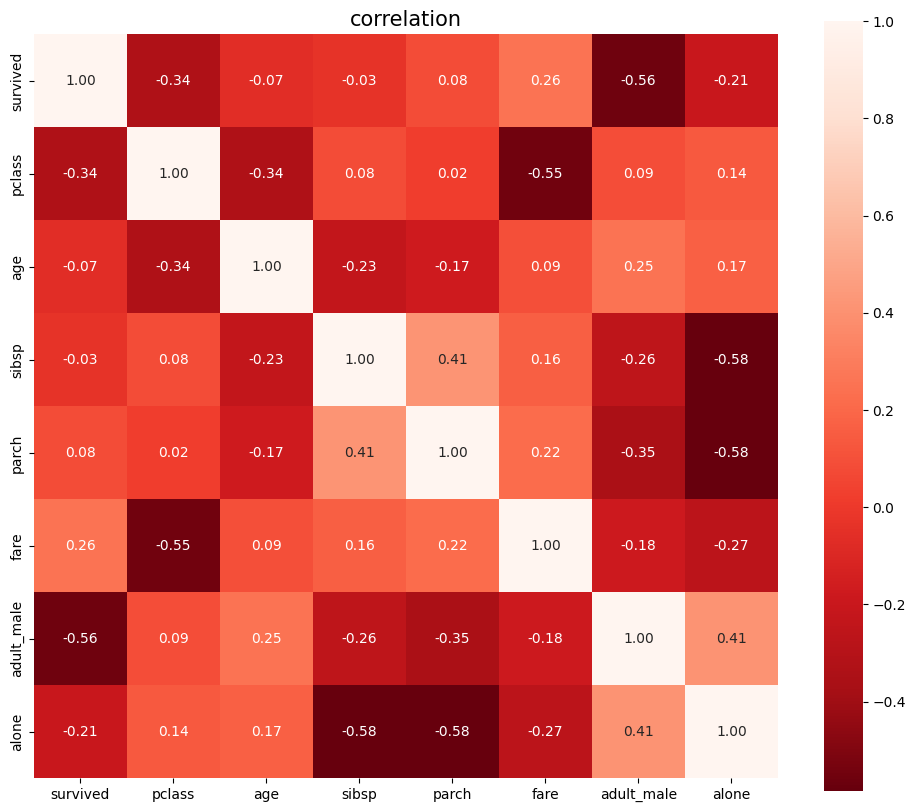

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",square=True,cmap="Reds_r")
plt.title("correlation",size=15)
plt.show()

In [ ]:
df['age_category']=pd.cut(df['age'], [0,10,20,30,40,50,60],
labels=['0-10','10-20','20-30','30-40','40-50','50-60'])

In [ ]:
df['age_category'].value_counts()

age_category
20-30    407
30-40    154
10-20    115
40-50     86
0-10      64
50-60     42
Name: count, dtype: int64

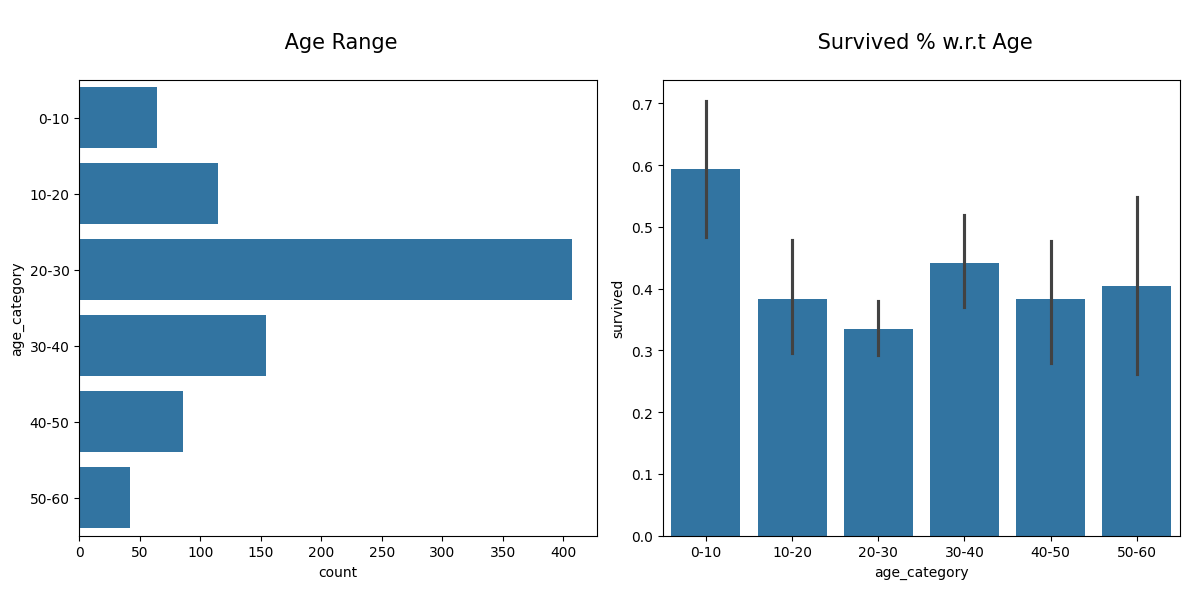

Text(0.5, 1.0, 'Survived & Died people between Age groups')

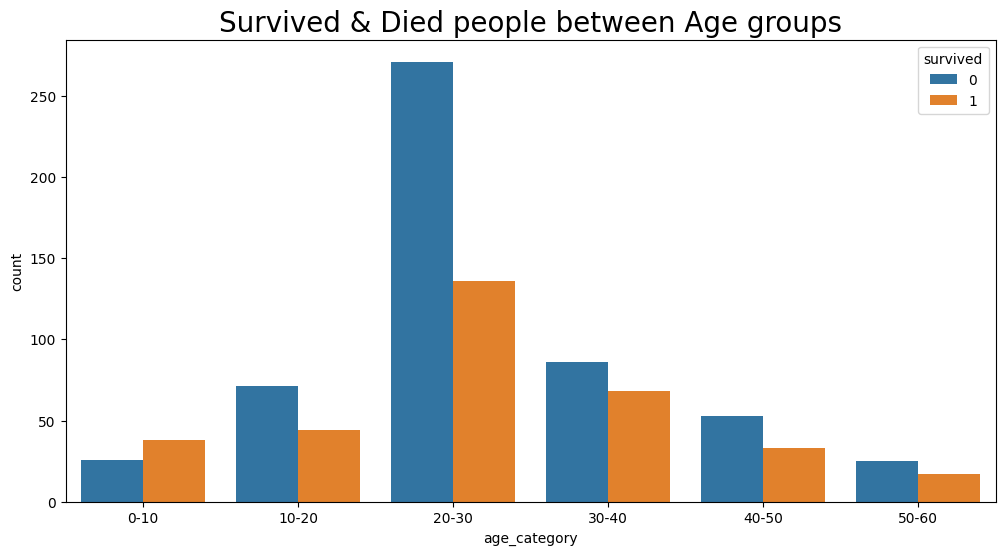

In [ ]:
fig,ax=plt.subplots(1,2 , figsize=(12,6))
#Countplot for Age categories
sns.countplot(df['age_category'] ,ax=ax[0] )
#Barplot for Survival vs Age categories
sns.barplot(x=df['age_category'] ,y=df['survived'] ,ax=ax[1] )
ax[0].set_title('\n Age Range\n',fontsize=15)
ax[1].set_title('\n Survived % w.r.t Age\n',fontsize=15)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(x=df['age_category'],hue=df['survived'])
plt.title('Survived & Died people between Age groups',fontsize=20)

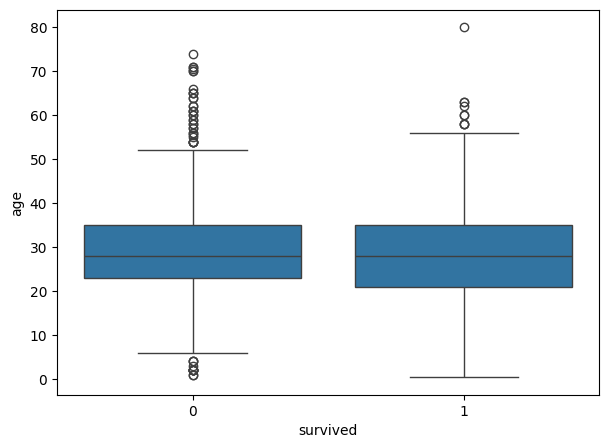

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='survived',y='age',data=df)
plt.show()

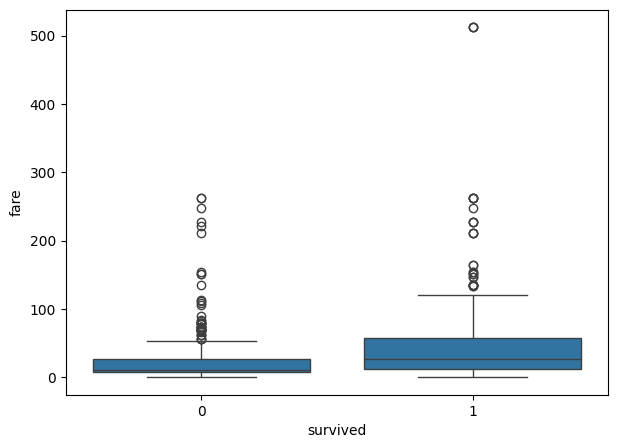

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="survived",y="fare",data=df)
plt.show()

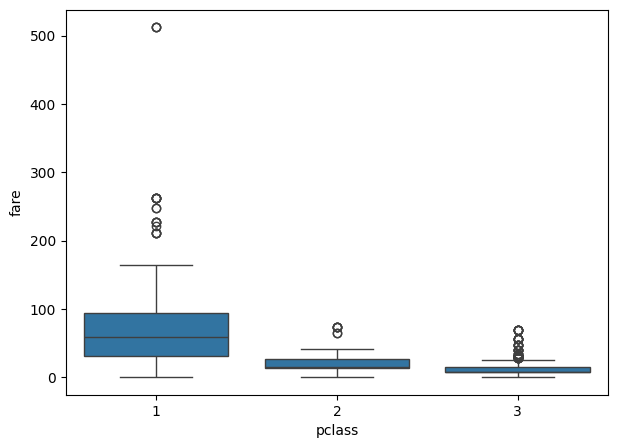

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="pclass",y="fare",data=df)
plt.show()

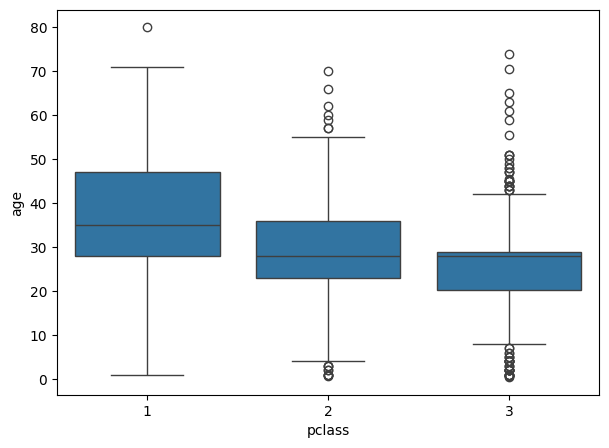

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='pclass',y='age',data=df)
plt.show()

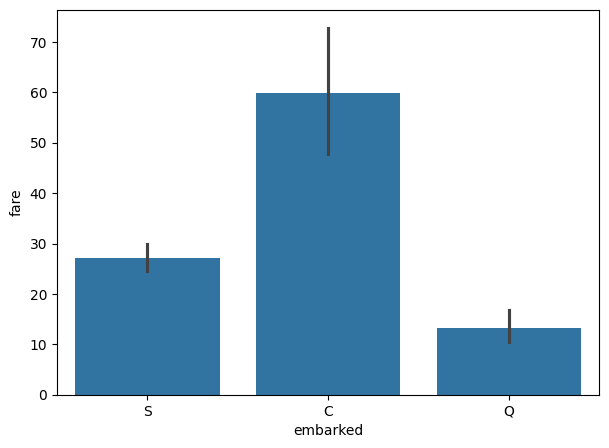

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='embarked',y='fare',data=df)
plt.show()

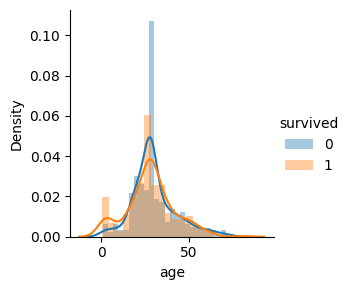

In [ ]:
sns.FacetGrid(df,hue="survived").map(sns.distplot,"age").add_legend()

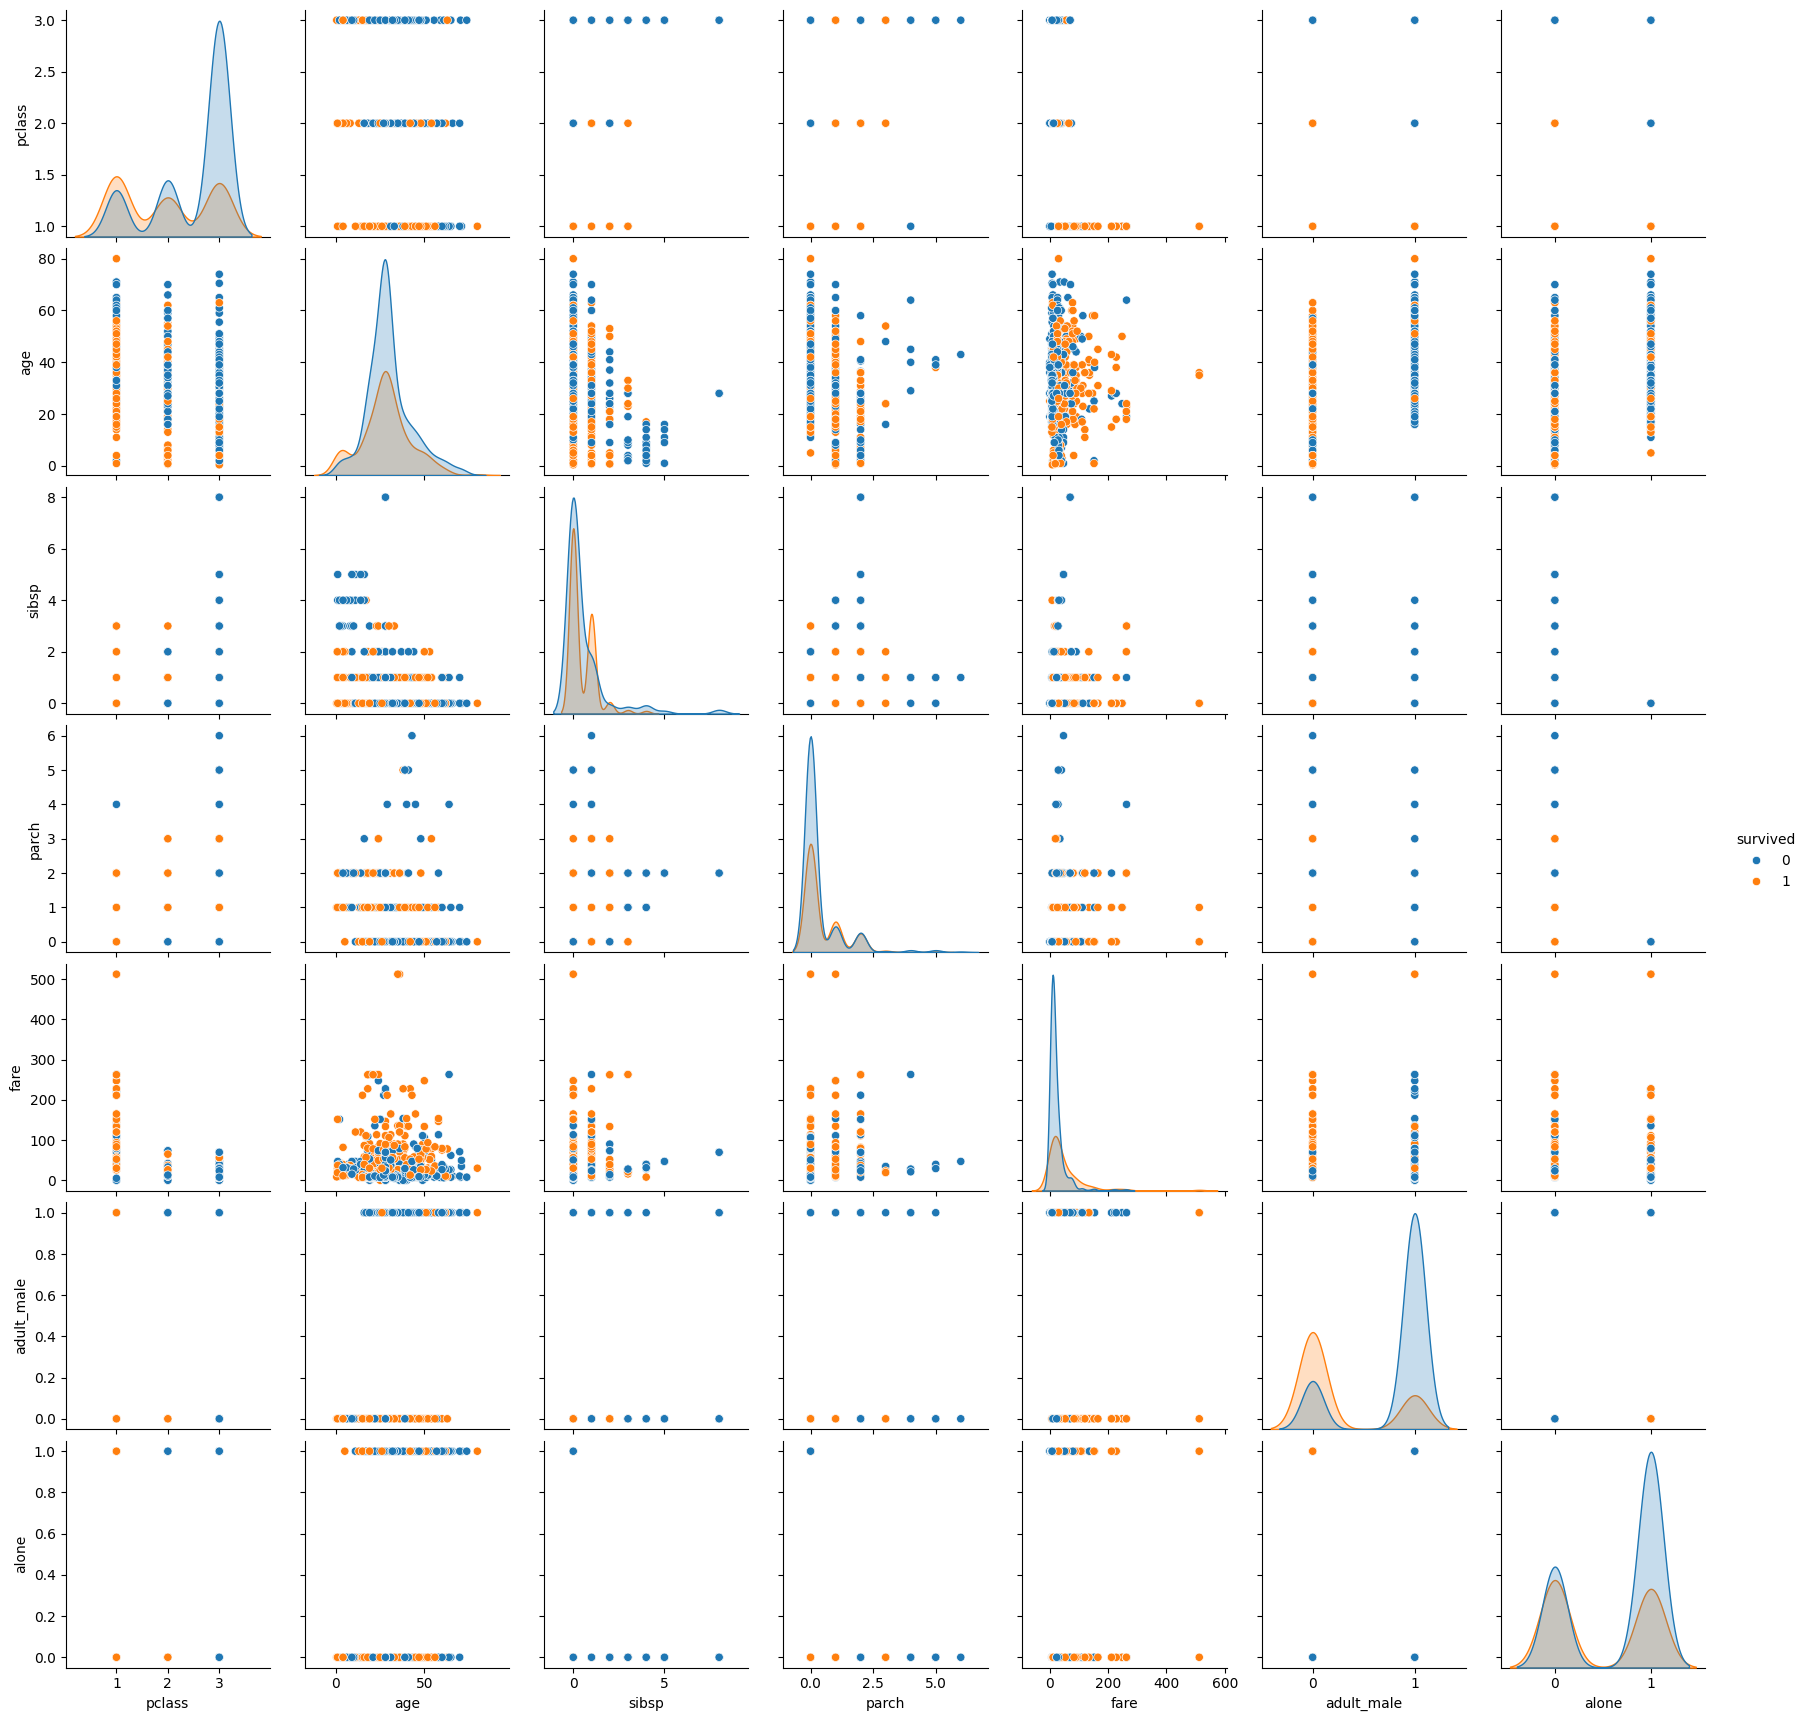

In [ ]:
sns.pairplot(df,hue="survived")
plt.show()

In [2]:
!git clone <https://github.com/Debasmita-Halder/tutorial-1.git>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/Debasmita-Halder/tutorial-1.git>'
